In [1]:
# TODO:


import importlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import multiprocessing as mp
from pathlib import PurePath, Path
import pyarrow
import scipy.stats as stats
import scipy
from statsmodels.tsa.stattools import adfuller
import time
import sys


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, classification_report, accuracy_score
from sklearn.model_selection import StratifiedKFold

from book_functions import *

importlib.reload(sys.modules['book_functions'])
# importlib.reload(sys.modules['sklearn'])

<module 'book_functions' from 'C:\\Users\\mlevy\\Workspace\\Advances-in-Financial-Machine-Learning\\book_functions.py'>

In [2]:
# 8.1
# a
X, cont = getTestData()

C:\Users\mlevy\Workspace\Advances-in-Financial-Machine-Learning\book_functions.py:530: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  end=pd.datetime.today())


In [3]:
X

,I_0,I_1,I_2,I_3,I_4,I_5,I_6,I_7,I_8,I_9,...,N_10,N_11,N_12,N_13,N_14,N_15,N_16,N_17,N_18,N_19
1981-01-14 15:58:54.576556,2.843740,0.456554,0.171107,-4.511382,0.278990,-3.474726,2.955550,2.698865,1.542440,2.198168,...,-0.330515,-0.845502,-1.477466,1.217536,0.304644,1.557365,0.202843,0.160110,0.933805,-0.132272
1981-01-15 15:58:54.576556,3.561541,-1.566097,3.342813,-1.938909,2.075749,-3.486711,0.494908,0.309615,1.059439,-0.792433,...,-0.020384,-0.751467,0.212077,0.285038,0.125461,0.203534,-0.376495,-0.938780,-0.142879,0.533263
1981-01-16 15:58:54.576556,7.699248,-3.030124,-0.859302,-0.033351,1.113719,-0.877844,2.344033,4.089113,2.287786,0.611413,...,0.744056,0.914181,1.586483,0.692802,-0.953431,0.679360,0.565153,0.219302,-1.110504,-1.086061
1981-01-19 15:58:54.576556,-0.149801,-3.182187,2.695894,1.359997,2.992416,-0.417971,-1.214058,1.268313,-3.720913,-2.580578,...,-1.960632,-2.064914,1.258648,-1.031856,0.645146,-0.063900,0.305844,0.371489,3.218969,0.867178
1981-01-20 15:58:54.576556,-2.157903,0.046380,0.697217,-1.012036,1.856002,-2.311465,2.715493,0.444433,-1.921790,-2.472372,...,-0.841121,0.081347,-2.587682,-0.416436,-1.077859,-0.428086,-0.183735,-0.434254,-2.124955,-0.709056
1981-01-21 15:58:54.576556,0.755562,-1.985183,1.965955,0.678833,2.039827,-0.438061,0.369237,0.858357,-1.716986,-2.726427,...,0.562328,-0.276744,-0.778877,0.642550,-0.279024,-0.060139,0.922658,-1.285629,0.512412,0.654320
1981-01-22 15:58:54.576556,1.468475,-1.756881,-1.004782,1.769866,1.830166,1.429992,0.431838,2.235487,-2.050875,-3.235666,...,1.023178,0.884522,1.223765,0.728524,-0.287064,-1.134530,0.428565,-0.971567,0.558368,-1.252909
1981-01-23 15:58:54.576556,6.054678,-1.098643,-0.492293,1.110135,1.814014,-0.717002,0.341712,0.589791,0.770925,-2.881367,...,0.064313,-1.706306,0.272723,0.168729,0.658984,0.241297,0.387609,0.153511,-0.732850,0.601347
1981-01-26 15:58:54.576556,2.999649,-3.379389,2.643704,-1.503824,1.055603,-1.446393,1.994143,1.352894,2.358203,-2.293059,...,-0.354635,2.116083,0.587430,-0.632192,-1.210894,0.171644,-0.254926,-1.203405,1.026370,0.942259
1981-01-27 15:58:54.576556,-3.111800,-0.427945,-0.692450,-3.974127,-1.730359,-2.506419,1.114475,2.017664,-4.145106,2.580348,...,0.113798,0.602475,-0.250854,-0.252865,1.605105,0.034272,1.515319,-1.042021,-0.463078,0.147488


In [4]:
cont

,bin,w,t1
1981-01-14 15:58:54.576556,0,0.0001,1981-01-14 15:58:54.576556
1981-01-15 15:58:54.576556,0,0.0001,1981-01-15 15:58:54.576556
1981-01-16 15:58:54.576556,0,0.0001,1981-01-16 15:58:54.576556
1981-01-19 15:58:54.576556,0,0.0001,1981-01-19 15:58:54.576556
1981-01-20 15:58:54.576556,0,0.0001,1981-01-20 15:58:54.576556
1981-01-21 15:58:54.576556,0,0.0001,1981-01-21 15:58:54.576556
1981-01-22 15:58:54.576556,0,0.0001,1981-01-22 15:58:54.576556
1981-01-23 15:58:54.576556,0,0.0001,1981-01-23 15:58:54.576556
1981-01-26 15:58:54.576556,0,0.0001,1981-01-26 15:58:54.576556
1981-01-27 15:58:54.576556,1,0.0001,1981-01-27 15:58:54.576556


In [25]:
# b
X_pca = orthoFeats(X)
X_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28
1981-01-14 15:58:54.576556,-2.247346,3.289565,-1.367301,-2.863059,-1.412666,-0.799908,0.213012,0.331433,0.866300,0.032951,...,1.944196,-0.481867,0.060209,-0.277116,-0.534618,0.986281,-0.384909,-0.801349,0.828607,-1.121230
1981-01-15 15:58:54.576556,-0.956982,-0.370077,-0.070016,-3.012735,0.317126,0.332048,-0.771460,-0.385234,0.124513,0.067744,...,-0.769808,-1.209847,-0.564018,-0.825132,0.753131,-0.379044,-0.456504,1.176804,-0.593204,0.354478
1981-01-16 15:58:54.576556,-4.432080,2.690585,1.475541,-1.157080,0.586217,0.561810,0.509762,-1.904502,1.081916,1.208494,...,-0.449401,0.567609,-0.040427,-0.911582,0.271040,-0.410972,2.323971,0.226183,2.398908,-0.385578
1981-01-19 15:58:54.576556,2.366804,-1.419525,0.356341,0.679244,2.952952,0.414377,0.889363,2.163380,0.454700,1.256352,...,2.320637,0.228787,1.007314,-1.230794,0.694026,1.360371,-0.970620,1.304913,-1.543305,-0.018166
1981-01-20 15:58:54.576556,1.104342,-0.693122,-0.555143,-1.283740,0.570558,-0.309020,-2.019225,-0.153222,0.867766,-0.339598,...,-2.428816,0.200491,-1.533220,-0.077449,1.194174,-0.406989,-1.561206,-0.957596,-0.192124,-2.333219


In [26]:
# c
clf = RandomForestClassifier(criterion='entropy', max_features=1, class_weight='balanced', n_estimators=100, oob_score=True)

In [28]:
%%time
mdi_imp, mdi_oob, mdi_oos = featImportance(X_pca, cont, clf, method='MDI')

Wall time: 17.8 s


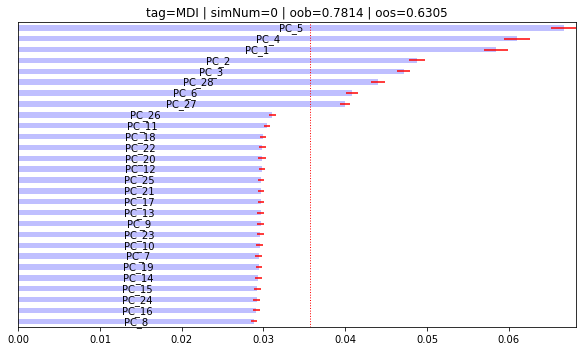

In [29]:
plotFeatImportance(' ', mdi_imp, mdi_oob, mdi_oos, method='MDI', tag='MDI')

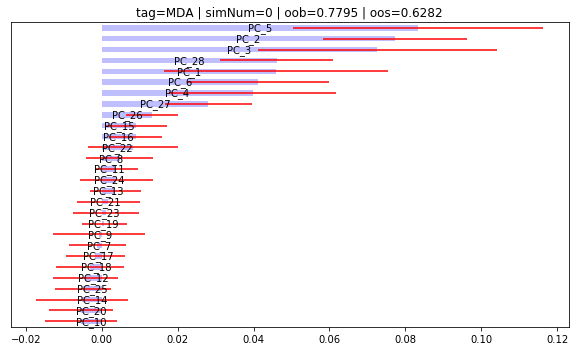

Wall time: 24.5 s


In [30]:
%%time
mda_imp, mda_oob, mda_oos = featImportance(X_pca, cont, clf, method='MDA')
plotFeatImportance(' ', mda_imp, mda_oob, mda_oos, method='MDA', tag='MDA')

2019-05-14 16:12:41.402378 100.0% auxFeatImpSFI done after 2.96 minutes. Remaining 0.0 minutes..


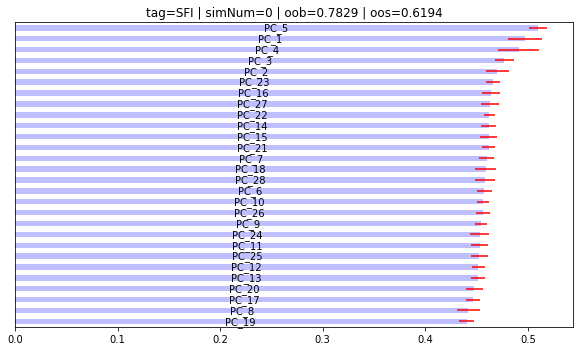

Wall time: 3min 17s


In [31]:
%%time
sfi_imp, sfi_oob, sfi_oos = featImportance(X_pca, cont, clf, method='SFI')
plotFeatImportance(' ', sfi_imp, sfi_oob, sfi_oos, method='SFI', tag='SFI')

### 8.1d
For the most part, the three methods agree on which features are most important. For example, each one determined PC_5 to be most important, with PC_4, PC_2, PC_1 all high up also. There were some discrepancies though, with MDI and MDA determining PC_28 to be important but SFI has it fairly low. In addition, SFI has PC_23 highly important while the other two methods ranked it much lower. These differences arise due to SFI missing the joint effects.

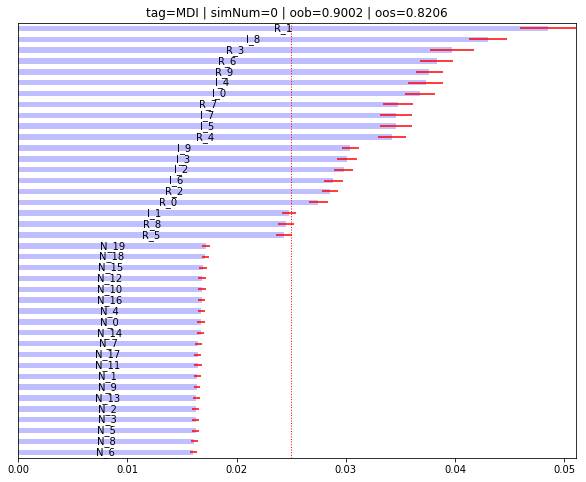

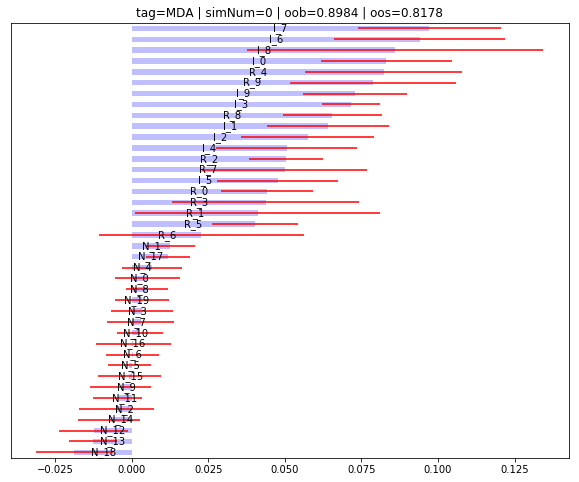

2019-05-14 16:30:33.901237 100.0% auxFeatImpSFI done after 3.84 minutes. Remaining 0.0 minutes...


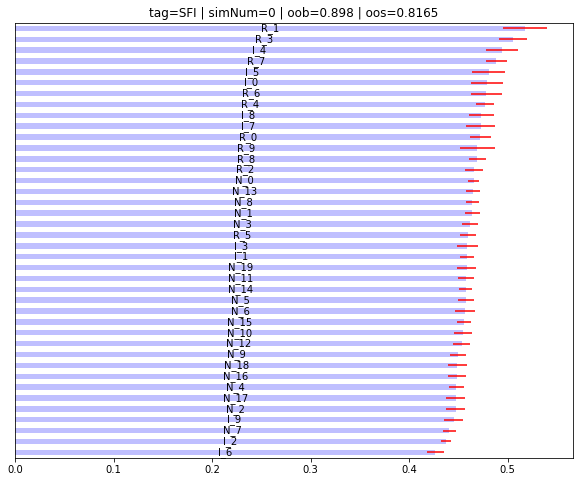

In [32]:
# For fun - testing w/o PCA (same as pg. 125)
mdi_imp, mdi_oob, mdi_oos = featImportance(X, cont, clf, method='MDI')
plotFeatImportance(' ', mdi_imp, mdi_oob, mdi_oos, method='MDI', tag='MDI')

mda_imp, mda_oob, mda_oos = featImportance(X, cont, clf, method='MDA')
plotFeatImportance(' ', mda_imp, mda_oob, mda_oos, method='MDA', tag='MDA')

sfi_imp, sfi_oob, sfi_oos = featImportance(X, cont, clf, method='SFI')
plotFeatImportance(' ', sfi_imp, sfi_oob, sfi_oos, method='SFI', tag='SFI')

In [34]:
# 8.2
X_union = pd.concat((X, X_pca), axis=1)

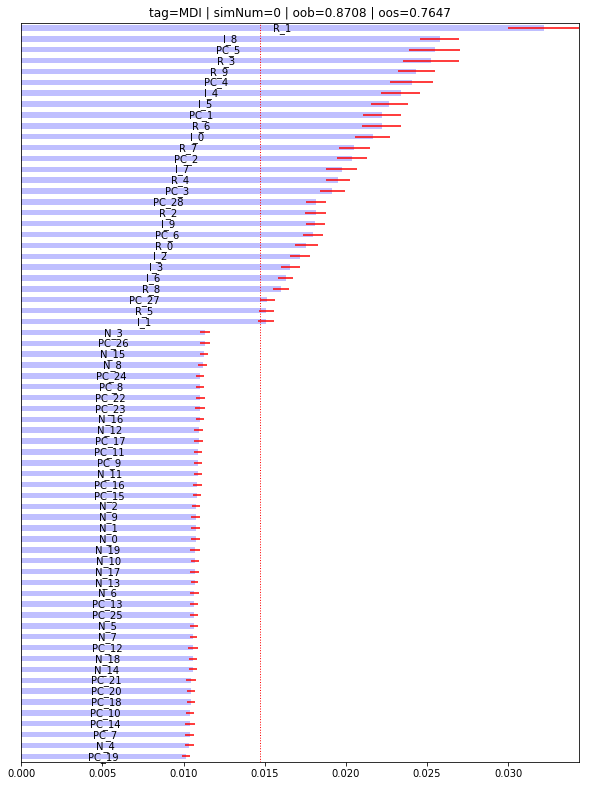

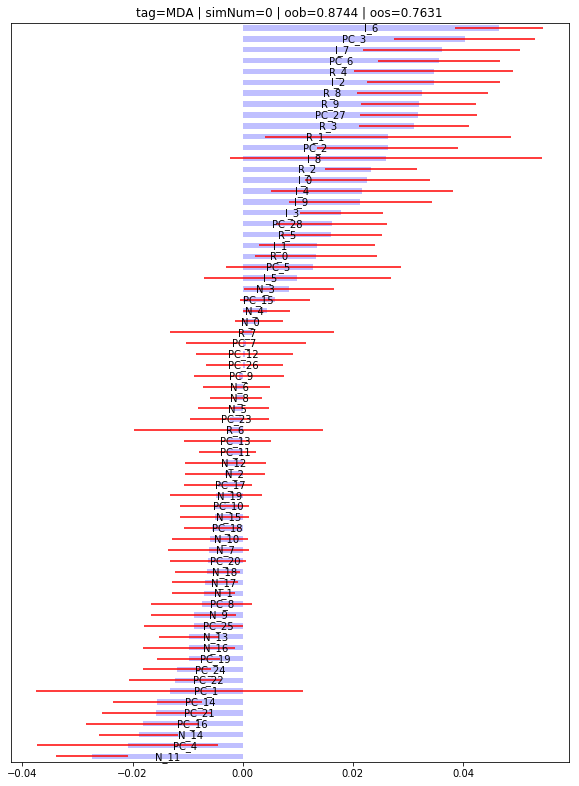

2019-05-14 16:48:20.151804 100.0% auxFeatImpSFI done after 6.47 minutes. Remaining 0.0 minutes...


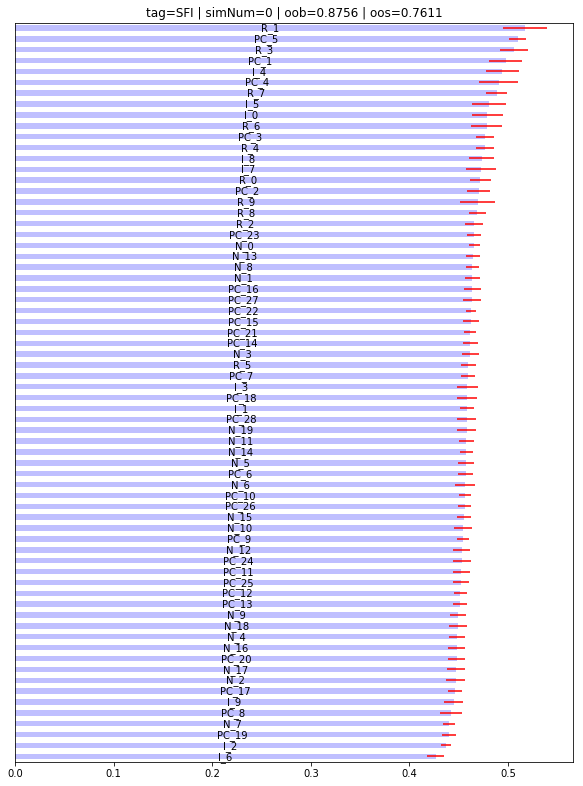

In [36]:
clf = RandomForestClassifier(criterion='entropy', max_features=1, class_weight='balanced', n_estimators=100, oob_score=True)

mdi_imp, mdi_oob, mdi_oos = featImportance(X_union, cont, clf, method='MDI')
plotFeatImportance(' ', mdi_imp, mdi_oob, mdi_oos, method='MDI', tag='MDI')

mda_imp, mda_oob, mda_oos = featImportance(X_union, cont, clf, method='MDA')
plotFeatImportance(' ', mda_imp, mda_oob, mda_oos, method='MDA', tag='MDA')

sfi_imp, sfi_oob, sfi_oos = featImportance(X_union, cont, clf, method='SFI')
plotFeatImportance(' ', sfi_imp, sfi_oob, sfi_oos, method='SFI', tag='SFI')

### 8.2b
Now the three methods do not agree on the important features. MDI and MDA have very different results due to substitution effects, as the PCA features presence impact the other features importance. Since SFI is not affected by substituion effects, the SFI results are not much different from the previous runs, hence SFI's benefits when running in combination with MDI and MDA

In [37]:
# 8.3
# a)
# MDI most important features: R_1, I_8, PC_5
# MDA most important features: I_6, PC_3, I_7
# SFI most important features: R_1, PC_5, R_3
drop_features = ['R_1', 'I_8', 'PC_5', 'I_6', 'PC_3', 'I_7', 'R_3']
X_triple_dot = X_union.drop(drop_features, axis=1)

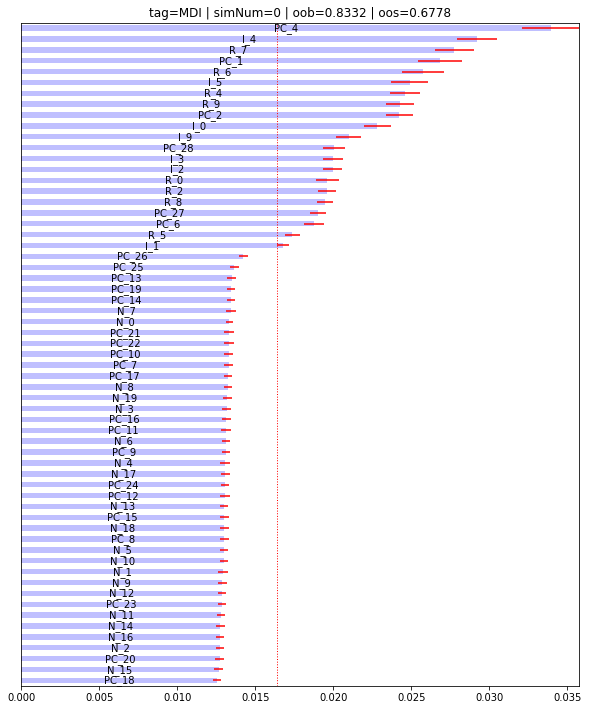

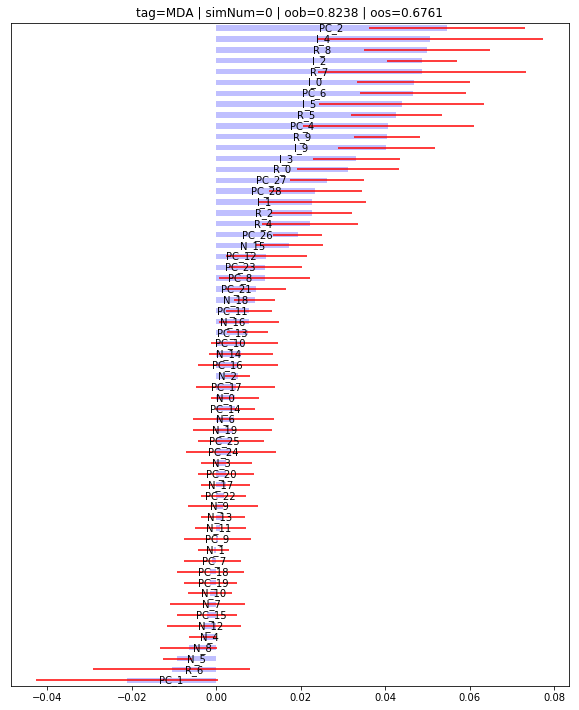

2019-05-14 17:09:50.256215 100.0% auxFeatImpSFI done after 5.92 minutes. Remaining 0.0 minutes...


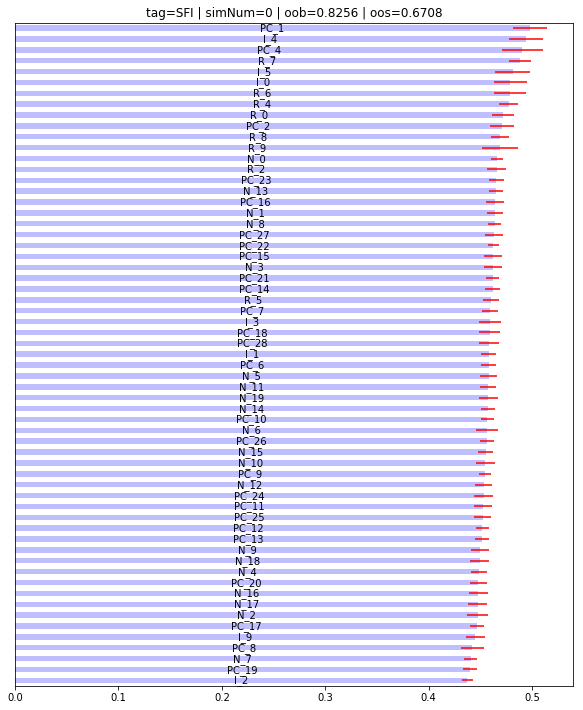

In [39]:
# b
clf = RandomForestClassifier(criterion='entropy', max_features=1, class_weight='balanced', n_estimators=100, oob_score=True)

mdi_imp, mdi_oob, mdi_oos = featImportance(X_triple_dot, cont, clf, method='MDI')
plotFeatImportance(' ', mdi_imp, mdi_oob, mdi_oos, method='MDI', tag='MDI')

mda_imp, mda_oob, mda_oos = featImportance(X_triple_dot, cont, clf, method='MDA')
plotFeatImportance(' ', mda_imp, mda_oob, mda_oos, method='MDA', tag='MDA')

sfi_imp, sfi_oob, sfi_oos = featImportance(X_triple_dot, cont, clf, method='SFI')
plotFeatImportance(' ', sfi_imp, sfi_oob, sfi_oos, method='SFI', tag='SFI')

### 8.3c
We see some improvement with the agreement on features between the three methods since we have reduced substitution effects somewhat

In [10]:
# 8.4
# a
X, cont = getTestData(n_features=20, n_informative=5, n_redundant=5, n_samples=int(1e6))

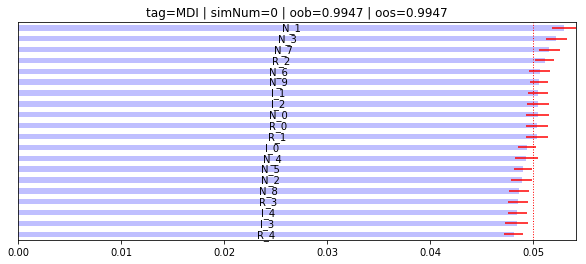

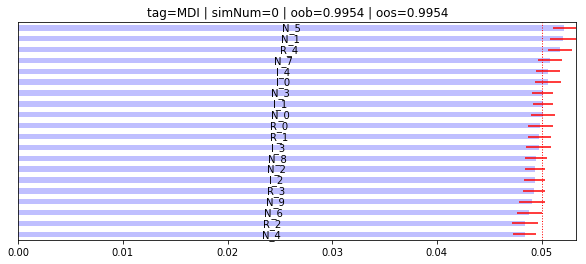

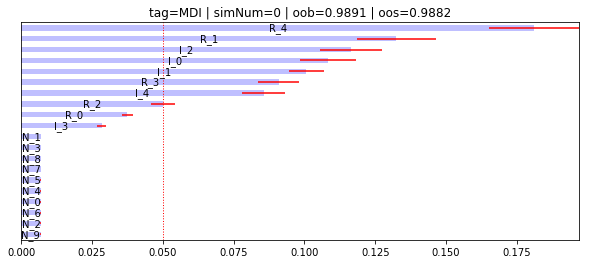

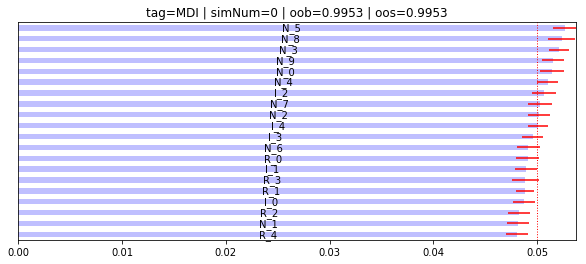

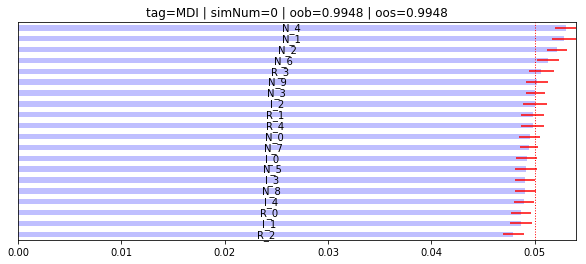

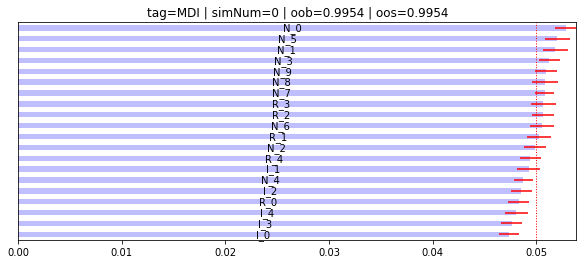

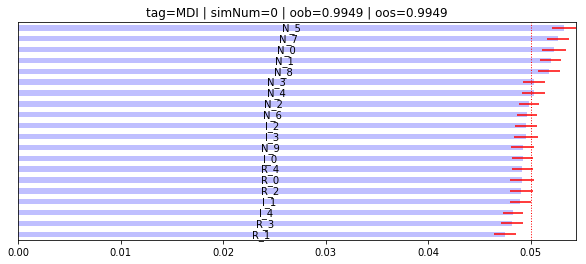

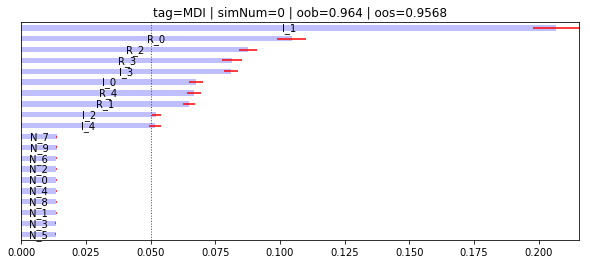

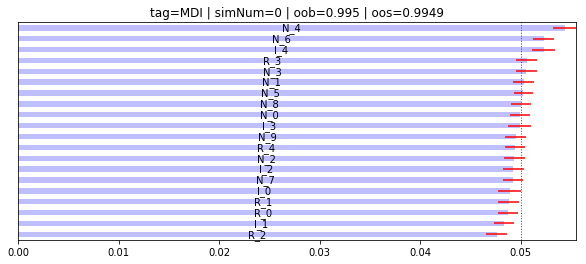

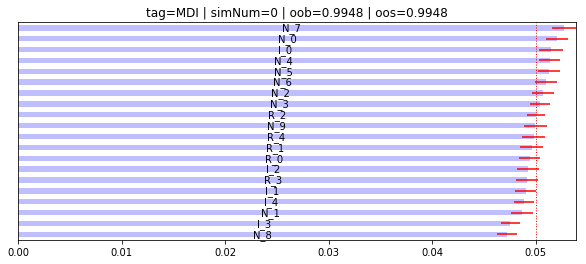

In [12]:
# b, c
#  todo: parallelize this for loop, include MDA and SFI also
ranks = pd.DataFrame(columns=['rank'])
clf = RandomForestClassifier(criterion='entropy', max_features=1, class_weight='balanced', n_estimators=100, oob_score=True)
for df, y in zip(np.array_split(X, 10), np.array_split(cont, 10)):
    mdi_imp, mdi_oob, mdi_oos = featImportance(df, y, clf, method='MDI')
    plotFeatImportance(' ', mdi_imp, mdi_oob, mdi_oos, method='MDI', tag='MDI')
    if ranks.empty:
        ranks['rank'] = mdi_imp['mean'].rank()
    else:
        ranks['rank'] = ranks['rank'] + mdi_imp['mean'].rank()

In [15]:
ranks.sort_values(by=['rank'], ascending=False)

,rank
N_3,137.0
N_7,133.0
N_5,130.0
N_0,129.0
N_1,126.0
N_6,113.0
N_4,111.0
N_9,107.0
I_2,106.0
R_3,101.0


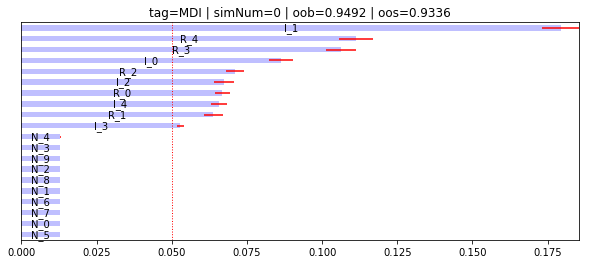

In [16]:
# d
mdi_imp, mdi_oob, mdi_oos = featImportance(X, cont, clf, method='MDI')
plotFeatImportance(' ', mdi_imp, mdi_oob, mdi_oos, method='MDI', tag='MDI')

### 8.4e
Since we had to create a weighting scheme to combine the parallelized feature importance results, where here we just ranked each feature every iteration and then added up all the rankings for a total score, the stacked version is much more reliable. As it can be seen from parallel version results, some iterations found all features to be very similar, and others where features were much stronger than others. By arbitarily ranking and then adding them up, obviously our weighting scheme is not going to be very accurate. This is one of the advantages of stacked feature importance as we don't need to come up with a weighting scheme to combine results.

C:\Users\mlevy\Workspace\Advances-in-Financial-Machine-Learning\book_functions.py:531: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  end=pd.datetime.today())


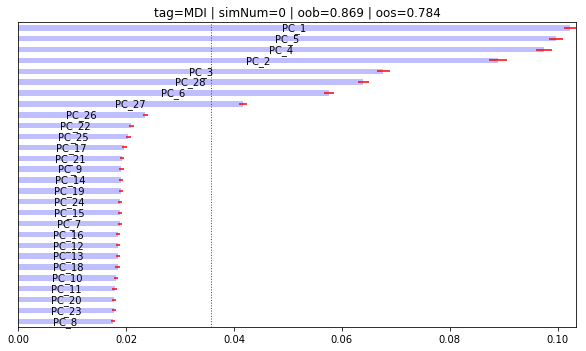

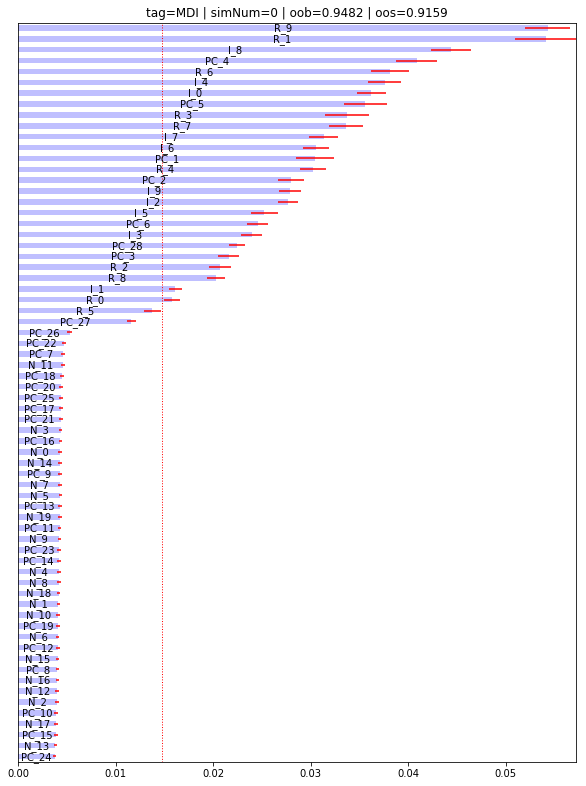

In [17]:
# 8.5
X, cont = getTestData()

# No max_features arg
clf = RandomForestClassifier(criterion='entropy', class_weight='balanced', n_estimators=100, oob_score=True)

# 8.1 w/ masking
X_pca = orthoFeats(X)
mdi_imp, mdi_oob, mdi_oos = featImportance(X_pca, cont, clf, method='MDI')
plotFeatImportance(' ', mdi_imp, mdi_oob, mdi_oos, method='MDI', tag='MDI')

# 8.2 w/ masking
X_union = pd.concat((X, X_pca), axis=1)
mdi_imp, mdi_oob, mdi_oos = featImportance(X_union, cont, clf, method='MDI')
plotFeatImportance(' ', mdi_imp, mdi_oob, mdi_oos, method='MDI', tag='MDI')



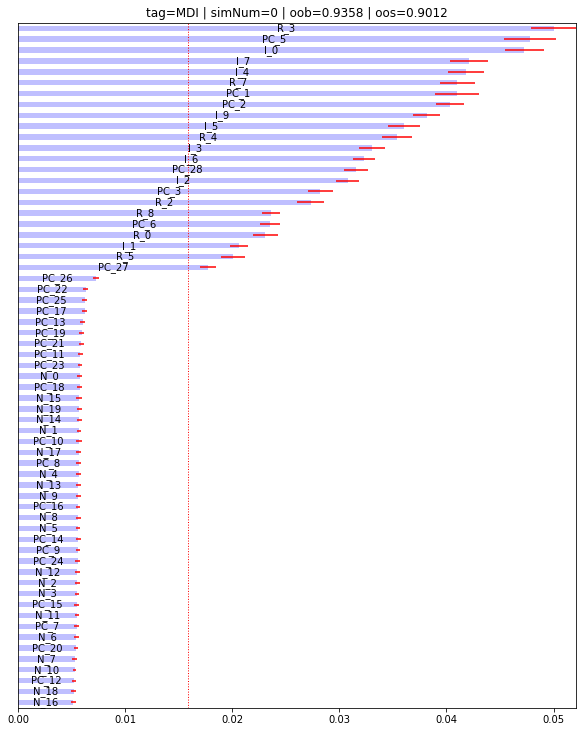

In [18]:
# 8.3 w/ masking
drop_features = ['R_9', 'R_1', 'I_8', 'PC_4', 'R_6']
X_triple_dot = X_union.drop(drop_features, axis=1)
mdi_imp, mdi_oob, mdi_oos = featImportance(X_triple_dot, cont, clf, method='MDI')
plotFeatImportance(' ', mdi_imp, mdi_oob, mdi_oos, method='MDI', tag='MDI')
    
# TODO: skipping 8.4 w/ masking since too time consuming

In [ ]:
# TODO: How do results differ? What effect did allowing masking have?